In [1]:
# This script is to import multiple text files from a URL, read them in, combine them, and then create a word cloud.
import fitz  # PyMuPDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import requests

In [11]:
# read text files in from a URL and combine the text

# Assuming file1.txt is in the same directory as your Jupyter Notebook or Docker container
file1_url = 'https://raw.githubusercontent.com/lanceDamage/dockWordCloud_PY/master/file1.txt'
file2_url = 'https://raw.githubusercontent.com/lanceDamage/dockWordCloud_PY/master/file2.txt'

# Download file1.txt
response1 = requests.get(file1_url)
with open('file1.txt', 'wb') as file1:
    file1.write(response1.content)

# Read the downloaded file into a Pandas DataFrame
df_file1 = pd.read_csv('file1.txt', sep=' ', header=None, names=['text_column'])

# Download file2.txt
response2 = requests.get(file2_url)
with open('file2.txt', 'wb') as file2:
    file2.write(response2.content)

df_file2 = pd.read_csv('file2.txt', sep=' ', header=None, names=['text_column'])

# Concatenate the DataFrames along the rows and extract the combined text
combined_text = ' '.join(pd.concat([df_file1['text_column'], df_file2['text_column']]).tolist())

In [12]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

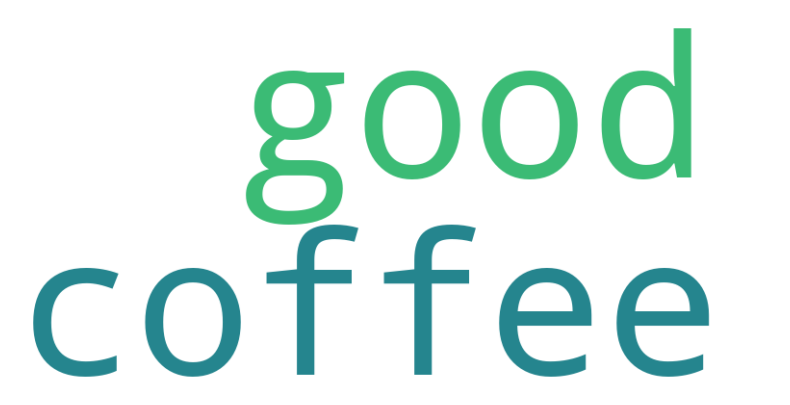

In [15]:
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (you can do this once)
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(combined_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
from nltk.corpus import stopwords

# Download NLTK resources (you can do this once)
nltk.download('stopwords')

# Remove stop words
stop_words = set(stopwords.words('english'))

# Add custom words to the stop_words set
custom_stop_words = {'really', 'good'}
stop_words.update(custom_stop_words)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


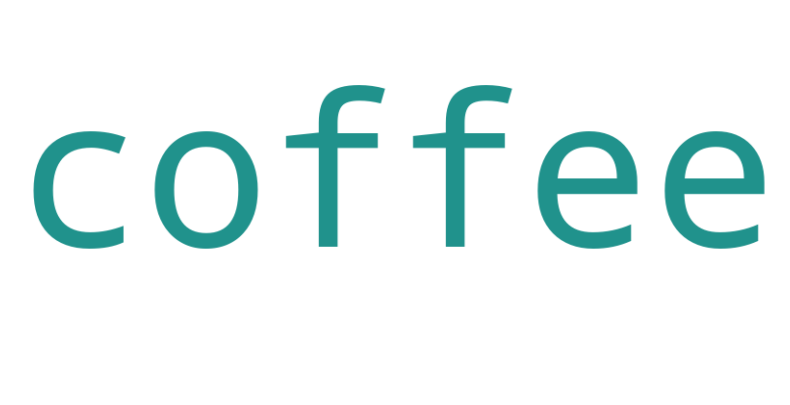

In [18]:
# Join the filtered tokens into a single string
filtered_text = ' '.join(filtered_tokens)

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
#save the word cloud into a .png
# Save the WordCloud as a .png file
wordcloud.to_file("wordcloudFCombine.png")

In [20]:
print("Current working directory:", os.getcwd())

Current working directory: /app/notebooks


In [10]:
##To get it out of the container could be tricky
##In a Debian linux system like Ubuntu, use the 'cp' command to move it. 
##I used sudo docker cp 'containerID':/app/wordcloud.png /path/to/destination/file/wordcloud.png